In [21]:



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [22]:
df = pd.read_csv("0216794e-b222-433f-aa99-ada7a9cfde85_Data.csv").dropna()
df = df.drop(columns = ["Country Code"])

df.head()

,Country Name,Series Name,Series Code,Scale (Precision),1996 [YR1996],1998 [YR1998],2000 [YR2000],2002 [YR2002],2003 [YR2003],2004 [YR2004],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Sweden,Control of Corruption: Estimate,CC.EST,Unit (0.0),2.2,2.2,2.2,2.2,2.1,2.1,...,2.3,2.2,2.1,2.1,2.1,2.1,2.1,2.1,2.1,2.1
1,Sweden,Government Effectiveness: Estimate,GE.EST,Unit (0.0),1.9,1.9,1.9,2.0,2.0,2.1,...,1.9,1.8,1.7,1.7,1.7,1.7,1.7,1.7,1.7,1.6
2,Sweden,Rule of Law: Estimate,RL.EST,Unit (0.0),1.8,1.8,1.8,1.8,1.9,1.9,...,1.9,2.0,2.0,2.0,2.0,1.8,1.8,1.8,1.8,1.7
3,Sweden,Political Stability and Absence of Violence/Te...,PV.EST,Unit (0.0),1.5,1.4,1.4,1.5,1.3,1.4,...,1.2,1.1,1.1,0.9,1.0,1.0,0.9,1.0,1.0,1.0
4,Sweden,Regulatory Quality: Estimate,RQ.EST,Unit (0.0),1.3,1.2,1.3,1.6,1.6,1.7,...,1.9,1.9,1.8,1.8,1.8,1.8,1.8,1.8,1.7,1.7


In [23]:
pca = PCA(n_components = 2)
data_2D = pca.fit_transform(df.drop(['Country Name', "Series Name", "Series Code", "Scale (Precision)"], axis=1))

print("The explained variance ratio is", round(pca.explained_variance_ratio_.sum(),2))

The explained variance ratio is 0.97


/var/folders/xh/2_ykktld4lz_4rb5ny5cphk40000gn/T/ipykernel_66714/398848301.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(data_2D[:, 0], data_2D[:, 1], cmap=plt.cm.Spectral)


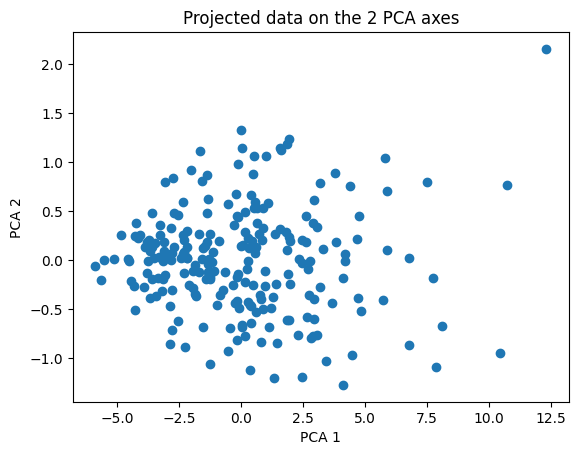

In [24]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(data_2D[:, 0], data_2D[:, 1], cmap=plt.cm.Spectral)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

ax.set_title("Projected data on the 2 PCA axes")
plt.show()

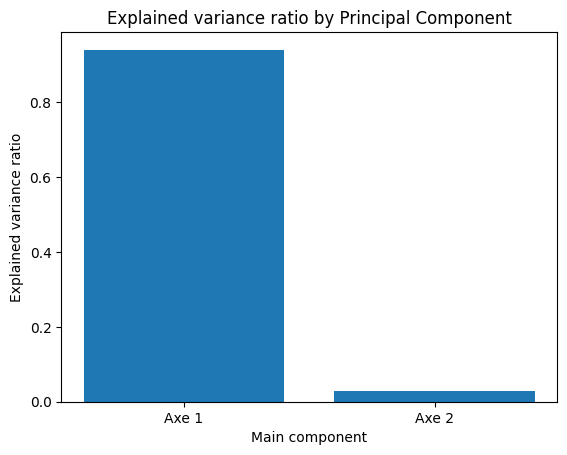

In [25]:
variance_expliquee = pca.explained_variance_ratio_

plt.bar(range(len(variance_expliquee)), variance_expliquee)
plt.xticks([0, 1], ['Axe 1', 'Axe 2'])
plt.xlabel('Main component')
plt.ylabel('Explained variance ratio')
plt.title('Explained variance ratio by Principal Component')
plt.show()


This means that the first principal axis accounts for a large proportion of the total variability in the data, around 84%. In other words, it captures the main part of the information contained in the 6 original variables and represents the main direction along which the data vary the most. The first principal axis (also known as the first factorial axis) is therefore the most informative, synthesizing most of the variation in the data into a single dimension.

In [29]:
charges_factorielles = pca.components_

# Ensure column names align with PCA input data
aligned_columns = df.columns[:charges_factorielles.shape[1]]  # Match the number of columns

# Create the DataFrame
df_charges_factorielles = pd.DataFrame(
    charges_factorielles,
    columns=aligned_columns,
    index=['Axe 1', 'Axe 2']  # Adjust the number of axes if necessary
)

# Display the DataFrame of factorial loads
display(df_charges_factorielles)


,Country Name,Series Name,Series Code,Scale (Precision),1996 [YR1996],1998 [YR1998],2000 [YR2000],2002 [YR2002],2003 [YR2003],2004 [YR2004],...,2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017]
Axe 1,-0.205886,-0.207524,-0.204172,-0.207708,-0.210337,-0.218265,-0.204809,-0.208473,-0.209422,-0.210438,...,-0.208078,-0.206710,-0.209400,-0.211681,-0.211017,-0.212522,-0.210588,-0.205083,-0.201356,-0.204709
Axe 2,-0.277529,-0.300470,-0.317190,-0.322495,-0.234814,-0.193948,-0.171193,-0.123081,-0.099560,-0.069637,...,0.071500,0.092934,0.179787,0.214171,0.256450,0.249962,0.240982,0.254718,0.255709,0.253634


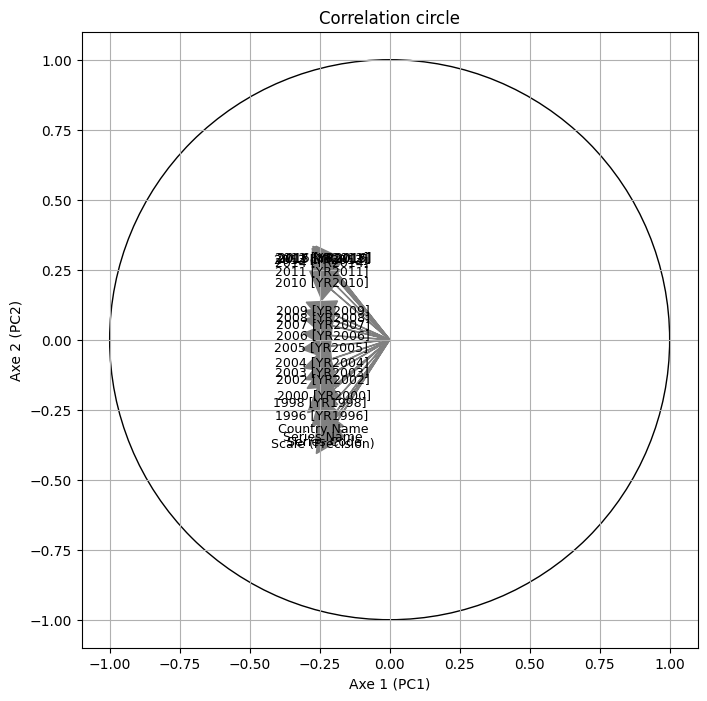

In [30]:
charges_factorielles = pca.components_

# Create the correlation circle
def draw_correlation_circle(df_charges_factorielles, pca, arrow_length=0.1, label_rotation=0):
    fig, ax = plt.subplots(figsize=(8, 8))
    for i, var in enumerate(df_charges_factorielles.columns):
        x = df_charges_factorielles.loc['Axe 1', var]
        y = df_charges_factorielles.loc['Axe 2', var]
        ax.arrow(0, 0, x, y, head_width=arrow_length, head_length=arrow_length, fc='gray', ec='gray')
        ax.text(x*1.15, y*1.15, var, ha='center', va='center', rotation=label_rotation, fontsize=9)
    circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='black')
    ax.add_artist(circle)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('Axe 1 (PC1)')
    ax.set_ylabel('Axe 2 (PC2)')
    ax.set_title('Correlation circle')
    plt.grid()
    plt.show()

# Call the function to plot the correlation circle
draw_correlation_circle(df_charges_factorielles, pca)


In other words, when a point of the dataset has a high coordinate along the first axis, the values of the 6 variables associated with that point decrease, and vice versa.

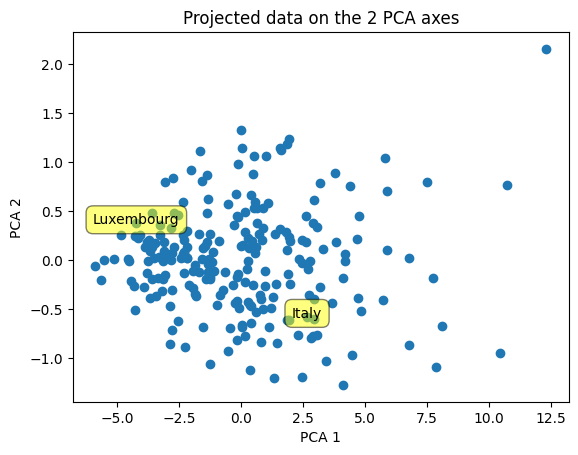

In [33]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(data_2D[:, 0], data_2D[:, 1])

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
plt.annotate(df.iloc[105]['Country Name'], (data_2D[105, 0], data_2D[105, 1] - 0.15), textcoords="offset points", xytext=(0, 10),
                ha='center', bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

plt.annotate(df.iloc[120]['Country Name'], (data_2D[120, 0], data_2D[120, 1] - 0.15), textcoords="offset points", xytext=(0, 10),
                ha='center', bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

ax.set_title("Projected data on the 2 PCA axes")
plt.show()